In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('gender_submission.csv')

In [4]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Note:
We can see from above info that there are null values in **Age**, **Cabin** and **Embarked** Columns as the no of non null objects are less in each of these columns is less than the total no of rows!

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
Y_train = train_df["Survived"].values

In [11]:
type(Y_train)

numpy.ndarray

In [12]:
Y_train.shape

(891,)

In [13]:
# print(test_df)
test_df.shape

(418, 11)

In [14]:
train_df.shape

(891, 12)

In [15]:
Y_test = df["Survived"].values

In [16]:
print(Y_test.shape)

(418,)


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [18]:
X_test = test_df.values

In [19]:
imp1 = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp2 = SimpleImputer(missing_values=np.nan, strategy="median")

In [20]:
train_df_trunc = train_df.drop(["Survived", "PassengerId","Name","Ticket","Cabin"], axis = 1)

In [21]:
train_df_trunc

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [22]:
test_df_trunc = test_df.drop(["PassengerId","Name","Ticket","Cabin"], axis = 1)

In [23]:
test_df_trunc

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [24]:
train_df_trunc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


In [25]:
X_train=train_df_trunc.values
X_test=test_df_trunc.values

In [26]:
X_train

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', nan, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [27]:
imp1.fit(X_train[:,-1].reshape(-1,1))

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

In [28]:
X_train[:,-1]=imp1.transform(X_train[:,-1].reshape(-1,1)).reshape(-1)

In [29]:
print(X_train)

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' nan ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


In [30]:
X_test[:,-1]=imp1.transform(X_test[:,-1].reshape(-1,1)).reshape(-1)

In [31]:
imp2.fit(X_train[:,2:3])

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [32]:
print(X_train[:,2:3])

[[22.0]
 [38.0]
 [26.0]
 [35.0]
 [35.0]
 [nan]
 [54.0]
 [2.0]
 [27.0]
 [14.0]
 [4.0]
 [58.0]
 [20.0]
 [39.0]
 [14.0]
 [55.0]
 [2.0]
 [nan]
 [31.0]
 [nan]
 [35.0]
 [34.0]
 [15.0]
 [28.0]
 [8.0]
 [38.0]
 [nan]
 [19.0]
 [nan]
 [nan]
 [40.0]
 [nan]
 [nan]
 [66.0]
 [28.0]
 [42.0]
 [nan]
 [21.0]
 [18.0]
 [14.0]
 [40.0]
 [27.0]
 [nan]
 [3.0]
 [19.0]
 [nan]
 [nan]
 [nan]
 [nan]
 [18.0]
 [7.0]
 [21.0]
 [49.0]
 [29.0]
 [65.0]
 [nan]
 [21.0]
 [28.5]
 [5.0]
 [11.0]
 [22.0]
 [38.0]
 [45.0]
 [4.0]
 [nan]
 [nan]
 [29.0]
 [19.0]
 [17.0]
 [26.0]
 [32.0]
 [16.0]
 [21.0]
 [26.0]
 [32.0]
 [25.0]
 [nan]
 [nan]
 [0.83]
 [30.0]
 [22.0]
 [29.0]
 [nan]
 [28.0]
 [17.0]
 [33.0]
 [16.0]
 [nan]
 [23.0]
 [24.0]
 [29.0]
 [20.0]
 [46.0]
 [26.0]
 [59.0]
 [nan]
 [71.0]
 [23.0]
 [34.0]
 [34.0]
 [28.0]
 [nan]
 [21.0]
 [33.0]
 [37.0]
 [28.0]
 [21.0]
 [nan]
 [38.0]
 [nan]
 [47.0]
 [14.5]
 [22.0]
 [20.0]
 [17.0]
 [21.0]
 [70.5]
 [29.0]
 [24.0]
 [2.0]
 [21.0]
 [nan]
 [32.5]
 [32.5]
 [54.0]
 [12.0]
 [nan]
 [24.0]
 [nan]
 [45.

In [33]:
X_train[:,2:3]=imp2.transform(X_train[:,2:3])

In [34]:
X_train

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', 28.0, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [35]:
X_test[:,2:3]=imp2.transform(X_test[:,2:3])
X_test[:,5:6]=imp2.fit_transform(X_test[:,5:6])

In [36]:
print(X_test[:,2:3])

[[34.5]
 [47.0]
 [62.0]
 [27.0]
 [22.0]
 [14.0]
 [30.0]
 [26.0]
 [18.0]
 [21.0]
 [28.0]
 [46.0]
 [23.0]
 [63.0]
 [47.0]
 [24.0]
 [35.0]
 [21.0]
 [27.0]
 [45.0]
 [55.0]
 [9.0]
 [28.0]
 [21.0]
 [48.0]
 [50.0]
 [22.0]
 [22.5]
 [41.0]
 [28.0]
 [50.0]
 [24.0]
 [33.0]
 [28.0]
 [30.0]
 [18.5]
 [28.0]
 [21.0]
 [25.0]
 [28.0]
 [39.0]
 [28.0]
 [41.0]
 [30.0]
 [45.0]
 [25.0]
 [45.0]
 [28.0]
 [60.0]
 [36.0]
 [24.0]
 [27.0]
 [20.0]
 [28.0]
 [28.0]
 [10.0]
 [35.0]
 [25.0]
 [28.0]
 [36.0]
 [17.0]
 [32.0]
 [18.0]
 [22.0]
 [13.0]
 [28.0]
 [18.0]
 [47.0]
 [31.0]
 [60.0]
 [24.0]
 [21.0]
 [29.0]
 [28.5]
 [35.0]
 [32.5]
 [28.0]
 [55.0]
 [30.0]
 [24.0]
 [6.0]
 [67.0]
 [49.0]
 [28.0]
 [28.0]
 [28.0]
 [27.0]
 [18.0]
 [28.0]
 [2.0]
 [22.0]
 [28.0]
 [27.0]
 [28.0]
 [25.0]
 [25.0]
 [76.0]
 [29.0]
 [20.0]
 [33.0]
 [43.0]
 [27.0]
 [28.0]
 [26.0]
 [16.0]
 [28.0]
 [21.0]
 [28.0]
 [28.0]
 [18.5]
 [41.0]
 [28.0]
 [36.0]
 [18.5]
 [63.0]
 [18.0]
 [28.0]
 [1.0]
 [36.0]
 [29.0]
 [12.0]
 [28.0]
 [35.0]
 [28.0]
 [28.0]
 [17

In [37]:
print(X_test)

[[3 'male' 34.5 ... 0 7.8292 'Q']
 [3 'female' 47.0 ... 0 7.0 'S']
 [2 'male' 62.0 ... 0 9.6875 'Q']
 ...
 [3 'male' 38.5 ... 0 7.25 'S']
 [3 'male' 28.0 ... 0 8.05 'S']
 [3 'male' 28.0 ... 1 22.3583 'C']]


In [38]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()

In [39]:
X_train[:,1:2]=enc.fit_transform(X_train[:,1:2])

In [40]:
print(X_train)

[[3 1 22.0 ... 0 7.25 'S']
 [1 0 38.0 ... 0 71.2833 'C']
 [3 0 26.0 ... 0 7.925 'S']
 ...
 [3 0 28.0 ... 2 23.45 'S']
 [1 1 26.0 ... 0 30.0 'C']
 [3 1 32.0 ... 0 7.75 'Q']]


In [41]:
X_test[:,1:2]=enc.transform(X_test[:,1:2])

In [42]:
print(X_test.shape)

(418, 7)


In [43]:
enc.fit(X_train[:,-1:])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [44]:
X_train = np.concatenate((X_train[:,:-1],enc.transform(X_train[:,-1:])), axis = 1)

In [45]:
print(X_train.shape)

(891, 9)


In [46]:
X_test = np.concatenate((X_test[:,:-1], enc.transform(X_test[:,-1:])), axis =1)
print(X_test.shape)

(418, 9)


In [47]:
print(X_train.shape,Y_train.shape)

(891, 9) (891,)


In [48]:
print(X_test.shape, Y_test.shape)

(418, 9) (418,)


In [49]:
w1 = np.random.rand(1,9)

In [50]:
w1*=0.1

In [51]:
w1

array([[0.04974611, 0.04202047, 0.03171774, 0.03762924, 0.09159856,
        0.09735364, 0.03014724, 0.01257206, 0.0855324 ]])

In [52]:
b1 = np.array([0])

In [53]:
b1

array([0])

In [54]:
def sigmoid(z):
#     print("Inside sigmoid z.shape",z.shape)
    return 1/(1+np.exp(-z))

In [55]:
def forward_prop(X, w, b):
#     print("forward prop X.shape",X.shape)
    z = np.dot(w,X)+b
    y_hat = sigmoid(z)
    return y_hat

In [56]:
def compute_cost(y, y_hat):
#     print("Inside compute cost", y.shape, y_hat.shape)
    return -1*np.sum((y*np.log(y_hat)+(1-y)*np.log(1-y_hat)))/y.shape[1]

In [57]:
def compute_grad(y, y_hat, A0):
    m=y.shape[1]
    dw = -1*(y-y_hat).dot(A0.T)/m
    db = -1*np.sum((y-y_hat), axis=1,keepdims=True)/m
    return dw, db

In [58]:
def log_regr_model(X,y,alpha,num_of_iter,w1,b1):
#     print(w1)
#     print("inside log_reg_model w1,X,b1",w1.shape,X.shape,b1.shape)
    costs=[]
    for i in range(num_of_iter):
        y_hat=forward_prop(X,w1,b1)
        cost = compute_cost(y,y_hat)
        costs+=[cost]
        dw1, db1 = compute_grad(y, y_hat, X)
        w1 = w1 - alpha*dw1
        b1 = b1 - alpha*db1
#         if(i%1==0):
#             print(f"Cost after iteration {i} is {cost}")
#             print(w1,b1)
    x_axis=list(range(num_of_iter))
    plt.plot(x_axis, costs, color='red')
    plt.xlabel("Iteration No.")
    plt.ylabel("Cost")
    plt.title("Training Data Cost")
    plt.show()
    return w1, b1, costs,y_hat

In [59]:
X_train = X_train.astype('float64')
X_test=X_test.astype('float64')
Y_train=Y_train.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)
print(Y_train.shape)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

(891, 1)


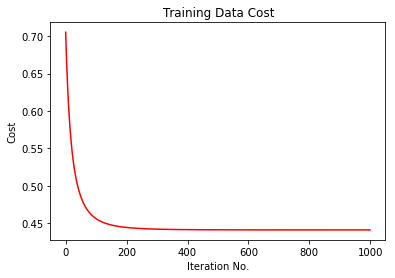

In [60]:
w_final,b_final,costs,Y_train_pred=log_regr_model(X_train.T, Y_train.T, 0.1, 1000,w1,b1)

In [61]:
print(Y_train.shape)

(891, 1)


In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
def correct(y_hat):
#     print(y_hat)
    y_hat = (y_hat>0.5).astype('int32')
    return y_hat

In [68]:
def eval(y,y_hat):
    y_hat=correct(y_hat)
#     print(y.shape, y_hat.shape)
    cm = confusion_matrix(y[0],y_hat[0])
    print(cm)
    acc = 0
    for i in range(cm.shape[0]):
#         print(cm[i,i])
        acc +=cm[i,i]
    print(acc)
    print(np.sum(cm))
    acc/=np.sum(cm)
    print(f"Accuracy = {acc}")
    return cm

In [69]:
Y_test_pred = forward_prop(X_test.T,w_final, b_final)

In [70]:
cm_train = eval(Y_train.T, Y_train_pred)

[[471  78]
 [102 240]]
711
891
Accuracy = 0.797979797979798
test accuracy: 79.79797979797979 %


In [71]:
cm_test = eval(Y_test.T, Y_test_pred)

[[252  14]
 [ 10 142]]
394
418
Accuracy = 0.9425837320574163
test accuracy: 94.25837320574163 %
